<a href="https://colab.research.google.com/github/larissavvsous/proj_int/blob/main/proj_integrador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

## Supermercado Menor preço

### Bibliotecas para tratamento e visualização de todos os supermercados

In [3]:
import pandas as pd
import numpy as np

In [4]:
menorpreco = pd.read_csv("/content/dataset_menorpreco.csv")
menorpreco

,WMbnJf href,lDY1rd src,TSUbDb,TSUbDb href,RvU3D href,Msppse href,A503be,QV3IV,Aohxlc,Aohxlc 2,dehysf,Jtu6Td,QWOdjf,QWOdjf 2,Txngnb,Txngnb 2
0,https://www.google.com/maps/contrib/1083394004...,https://lh3.googleusercontent.com/a-/AD_cMMRkq...,Francisco Messias Barbosa de Lima,https://www.google.com/maps/contrib/1083394004...,https://www.google.com/local/review/rap/report...,https://www.google.com/maps/contrib/1083394004...,35 comentários9 fotos,Local Guide,·,·,4 anos atrás,Excelente atendimento e um mundo de produtos a...,0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.
1,https://www.google.com/maps/contrib/1109568860...,https://lh3.googleusercontent.com/a/AAcHTtc72k...,Igor Sousa,https://www.google.com/maps/contrib/1109568860...,https://www.google.com/local/review/rap/report...,https://www.google.com/maps/contrib/1109568860...,3 comentários,NaN,NaN,NaN,4 anos atrás,"Ambiente agradável, bom atendimento, funcionár...",0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.
2,https://www.google.com/maps/contrib/1060057250...,https://lh3.googleusercontent.com/a-/AD_cMMSrD...,INTELIGENCIA ARTIFICIAL 2020,https://www.google.com/maps/contrib/1060057250...,https://www.google.com/local/review/rap/report...,https://www.google.com/maps/contrib/1060057250...,34 comentários79 fotos,Local Guide,·,·,3 anos atrás,Bom local com preços baixos,1.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.
3,https://www.google.com/maps/contrib/1014439860...,https://lh3.googleusercontent.com/a-/AD_cMMRtO...,Vanessa Lima,https://www.google.com/maps/contrib/1014439860...,https://www.google.com/local/review/rap/report...,https://www.google.com/maps/contrib/1014439860...,38 comentários82 fotos,Local Guide,·,·,4 anos atrás,Tudo mais barato! Melhor referência para quem ...,0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.
4,https://www.google.com/maps/contrib/1039208358...,https://lh3.googleusercontent.com/a-/AD_cMMTGH...,Joyce Costa,https://www.google.com/maps/contrib/1039208358...,https://www.google.com/local/review/rap/report...,https://www.google.com/maps/contrib/1039208358...,10 comentários,NaN,NaN,NaN,4 anos atrás,Ambiente super apertado e funcionários altamen...,0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,https://www.google.com/maps/contrib/1174884696...,https://lh3.googleusercontent.com/a-/AD_cMMQ_N...,Thayner Oliveira,https://www.google.com/maps/contrib/1174884696...,https://www.google.com/local/review/rap/report...,NaN,NaN,NaN,NaN,NaN,6 anos atrás,NaN,NaN,NaN,NaN,NaN
181,https://www.google.com/maps/contrib/1056995909...,https://lh3.googleusercontent.com/a-/AD_cMMRep...,Genival Viana,https://www.google.com/maps/contrib/1056995909...,https://www.google.com/local/review/rap/report...,NaN,NaN,NaN,NaN,NaN,4 anos atrás,NaN,NaN,NaN,NaN,NaN
182,https://www.google.com/maps/contrib/1155994509...,https://lh3.googleusercontent.com/a-/AD_cMMQ-p...,Larissa Brioso,https://www.google.com/maps/contrib/1155994509...,https://www.google.com/local/review/rap/report...,https://www.google.com/maps/contrib/1155994509...,339 comentários2.103 fotos,Local Guide,·,·,4 anos atrás,NaN,NaN,NaN,NaN,NaN
183,https://www.google.com/maps/contrib/1128692846...,https://lh3.googleusercontent.com/a-/AD_cMMRXc...,Ana Beatriz Cruz Rocha,https://www.google.com/maps/contrib/1128692846...,https://www.google.com/local/review/rap/report...,https://www.google.com/maps/contrib/1128692846...,16 comentários1 foto,Local Guide,·,·,2 anos atrás,NaN,NaN,NaN,NaN,NaN


In [5]:
print(menorpreco.columns)

Index(['WMbnJf href', 'lDY1rd src', 'TSUbDb', 'TSUbDb href', 'RvU3D href',
       'Msppse href', 'A503be', 'QV3IV', 'Aohxlc', 'Aohxlc 2', 'dehysf',
       'Jtu6Td', 'QWOdjf', 'QWOdjf 2', 'Txngnb', 'Txngnb 2'],
      dtype='object')


### Excluindo colunas irrelevantes

In [6]:
menorpreco.drop("WMbnJf href", axis=1, inplace=True)
menorpreco.drop("lDY1rd src", axis=1, inplace=True)
menorpreco.drop("TSUbDb href", axis=1, inplace=True)
menorpreco.drop("RvU3D href", axis=1, inplace=True)
menorpreco.drop("Msppse href", axis=1, inplace=True)
menorpreco.drop("Aohxlc", axis=1, inplace=True)
menorpreco.drop("Aohxlc 2", axis=1, inplace=True)
menorpreco.drop("Txngnb 2", axis=1, inplace=True)
menorpreco.drop("QWOdjf 2", axis=1, inplace=True)

In [7]:
menorpreco

,TSUbDb,A503be,QV3IV,dehysf,Jtu6Td,QWOdjf,Txngnb
0,Francisco Messias Barbosa de Lima,35 comentários9 fotos,Local Guide,4 anos atrás,Excelente atendimento e um mundo de produtos a...,0.0,Agradecemos sua ajuda.
1,Igor Sousa,3 comentários,NaN,4 anos atrás,"Ambiente agradável, bom atendimento, funcionár...",0.0,Agradecemos sua ajuda.
2,INTELIGENCIA ARTIFICIAL 2020,34 comentários79 fotos,Local Guide,3 anos atrás,Bom local com preços baixos,1.0,Agradecemos sua ajuda.
3,Vanessa Lima,38 comentários82 fotos,Local Guide,4 anos atrás,Tudo mais barato! Melhor referência para quem ...,0.0,Agradecemos sua ajuda.
4,Joyce Costa,10 comentários,NaN,4 anos atrás,Ambiente super apertado e funcionários altamen...,0.0,Agradecemos sua ajuda.
...,...,...,...,...,...,...,...
180,Thayner Oliveira,NaN,NaN,6 anos atrás,NaN,NaN,NaN
181,Genival Viana,NaN,NaN,4 anos atrás,NaN,NaN,NaN
182,Larissa Brioso,339 comentários2.103 fotos,Local Guide,4 anos atrás,NaN,NaN,NaN
183,Ana Beatriz Cruz Rocha,16 comentários1 foto,Local Guide,2 anos atrás,NaN,NaN,NaN


### Traduzindo os códigos das colunas para nomes

In [8]:
nome_colunas = {
    'TSUbDb': 'nome',
    'QV3IV': 'local_guide',
    'dehysf': 'periodo',
    'Jtu6Td': 'comentario',
    'QWOdjf': 'quant_like_coment',
    'Txngnb': 'feedback_super'}

menorpreco.rename(columns=nome_colunas, inplace=True)
menorpreco

,nome,A503be,local_guide,periodo,comentario,quant_like_coment,feedback_super
0,Francisco Messias Barbosa de Lima,35 comentários9 fotos,Local Guide,4 anos atrás,Excelente atendimento e um mundo de produtos a...,0.0,Agradecemos sua ajuda.
1,Igor Sousa,3 comentários,NaN,4 anos atrás,"Ambiente agradável, bom atendimento, funcionár...",0.0,Agradecemos sua ajuda.
2,INTELIGENCIA ARTIFICIAL 2020,34 comentários79 fotos,Local Guide,3 anos atrás,Bom local com preços baixos,1.0,Agradecemos sua ajuda.
3,Vanessa Lima,38 comentários82 fotos,Local Guide,4 anos atrás,Tudo mais barato! Melhor referência para quem ...,0.0,Agradecemos sua ajuda.
4,Joyce Costa,10 comentários,NaN,4 anos atrás,Ambiente super apertado e funcionários altamen...,0.0,Agradecemos sua ajuda.
...,...,...,...,...,...,...,...
180,Thayner Oliveira,NaN,NaN,6 anos atrás,NaN,NaN,NaN
181,Genival Viana,NaN,NaN,4 anos atrás,NaN,NaN,NaN
182,Larissa Brioso,339 comentários2.103 fotos,Local Guide,4 anos atrás,NaN,NaN,NaN
183,Ana Beatriz Cruz Rocha,16 comentários1 foto,Local Guide,2 anos atrás,NaN,NaN,NaN


### Atribuindo valores às NAs

In [9]:
menorpreco['quant_like_coment'].fillna(0, inplace=True)

menorpreco['local_guide'].fillna("Not Local Guide", inplace=True)

menorpreco['comentario'].fillna("Sem comentário", inplace=True)

menorpreco['feedback_super'].fillna("Sem feedback", inplace=True)

menorpreco

,nome,A503be,local_guide,periodo,comentario,quant_like_coment,feedback_super
0,Francisco Messias Barbosa de Lima,35 comentários9 fotos,Local Guide,4 anos atrás,Excelente atendimento e um mundo de produtos a...,0.0,Agradecemos sua ajuda.
1,Igor Sousa,3 comentários,Not Local Guide,4 anos atrás,"Ambiente agradável, bom atendimento, funcionár...",0.0,Agradecemos sua ajuda.
2,INTELIGENCIA ARTIFICIAL 2020,34 comentários79 fotos,Local Guide,3 anos atrás,Bom local com preços baixos,1.0,Agradecemos sua ajuda.
3,Vanessa Lima,38 comentários82 fotos,Local Guide,4 anos atrás,Tudo mais barato! Melhor referência para quem ...,0.0,Agradecemos sua ajuda.
4,Joyce Costa,10 comentários,Not Local Guide,4 anos atrás,Ambiente super apertado e funcionários altamen...,0.0,Agradecemos sua ajuda.
...,...,...,...,...,...,...,...
180,Thayner Oliveira,NaN,Not Local Guide,6 anos atrás,Sem comentário,0.0,Sem feedback
181,Genival Viana,NaN,Not Local Guide,4 anos atrás,Sem comentário,0.0,Sem feedback
182,Larissa Brioso,339 comentários2.103 fotos,Local Guide,4 anos atrás,Sem comentário,0.0,Sem feedback
183,Ana Beatriz Cruz Rocha,16 comentários1 foto,Local Guide,2 anos atrás,Sem comentário,0.0,Sem feedback


### Dividindo a coluna "A503be" em duas: **quantidade de comentarios** e **quantidade de fotos**

In [10]:
divisao = pd.DataFrame(menorpreco['A503be'])

divisao['quant_comentarios'] = divisao['A503be'].str.extract(r'(\d+) comentários', expand=False).fillna(0).astype(int)
divisao['quant_fotos'] = divisao['A503be'].str.extract(r'(\d+) fotos', expand=False).fillna(0).astype(int)

print(divisao[['quant_comentarios', 'quant_fotos']])


     quant_comentarios  quant_fotos
0                   35            9
1                    3            0
2                   34           79
3                   38           82
4                   10            0
..                 ...          ...
180                  0            0
181                  0            0
182                339          103
183                 16            0
184                 21            3

[185 rows x 2 columns]


### Adicionando as colunas **quantidade de comentarios** e **quantidade de fotos** no dataset original

In [11]:
menorpreco = pd.concat([menorpreco, divisao[['quant_comentarios', 'quant_fotos']]], axis=1)

### Excluindo a coluna antiga "A503be"

In [12]:
menorpreco.drop("A503be", axis=1, inplace=True)

In [13]:
menorpreco

,nome,local_guide,periodo,comentario,quant_like_coment,feedback_super,quant_comentarios,quant_fotos
0,Francisco Messias Barbosa de Lima,Local Guide,4 anos atrás,Excelente atendimento e um mundo de produtos a...,0.0,Agradecemos sua ajuda.,35,9
1,Igor Sousa,Not Local Guide,4 anos atrás,"Ambiente agradável, bom atendimento, funcionár...",0.0,Agradecemos sua ajuda.,3,0
2,INTELIGENCIA ARTIFICIAL 2020,Local Guide,3 anos atrás,Bom local com preços baixos,1.0,Agradecemos sua ajuda.,34,79
3,Vanessa Lima,Local Guide,4 anos atrás,Tudo mais barato! Melhor referência para quem ...,0.0,Agradecemos sua ajuda.,38,82
4,Joyce Costa,Not Local Guide,4 anos atrás,Ambiente super apertado e funcionários altamen...,0.0,Agradecemos sua ajuda.,10,0
...,...,...,...,...,...,...,...,...
180,Thayner Oliveira,Not Local Guide,6 anos atrás,Sem comentário,0.0,Sem feedback,0,0
181,Genival Viana,Not Local Guide,4 anos atrás,Sem comentário,0.0,Sem feedback,0,0
182,Larissa Brioso,Local Guide,4 anos atrás,Sem comentário,0.0,Sem feedback,339,103
183,Ana Beatriz Cruz Rocha,Local Guide,2 anos atrás,Sem comentário,0.0,Sem feedback,16,0


### Criando duas colunas (**nome** e **endereço** do supermercado) para nos ajudar futuramente a analisar cada supermercado separadamente, quando juntarmos os dados de todos os supermercados.

In [14]:
menorpreco['supermercado'] = 'Menor preço'
menorpreco['rua_supermercado'] = 'Manoel Luís da Rocha, 87'

In [15]:
df_menorpreco = menorpreco

### Salvando o dataset

In [16]:
df_menorpreco.to_csv("menorpreco_tratado.csv")

# Supermercado Para Ty

In [17]:
paraty = pd.read_csv("/content/dataset_paraty.csv")

paraty

,WMbnJf href,lDY1rd src,TSUbDb,TSUbDb href,RvU3D href,Msppse href,A503be,dehysf,Jtu6Td,QWOdjf,QWOdjf 2,Txngnb,Txngnb 2,QV3IV,Aohxlc,Aohxlc 2,LfKETd,pi8uOe,d6SCIc
0,https://www.google.com/maps/contrib/1167623284...,https://lh3.googleusercontent.com/a-/AD_cMMTzL...,Emanuel Ávila,https://www.google.com/maps/contrib/1167623284...,https://www.google.com/local/review/rap/report...,https://www.google.com/maps/contrib/1167623284...,3 comentários,4 meses atrás,"Ótimo supermercado, existem inúmeras variedade...",0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.google.com/maps/contrib/1038542509...,https://lh3.googleusercontent.com/a-/AD_cMMQ7Y...,Lopes Max,https://www.google.com/maps/contrib/1038542509...,https://www.google.com/local/review/rap/report...,https://www.google.com/maps/contrib/1038542509...,45 comentários3 fotos,9 meses atrás,NaN,0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,Local Guide,·,·,NaN,NaN,NaN
2,https://www.google.com/maps/contrib/1159216601...,https://lh3.googleusercontent.com/a/AAcHTtdPzW...,Jose Jose,https://www.google.com/maps/contrib/1159216601...,https://www.google.com/local/review/rap/report...,https://www.google.com/maps/contrib/1159216601...,Um comentário,um mês atrás,E caro mas tá bão,0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.google.com/maps/contrib/1168623417...,https://lh3.googleusercontent.com/a/AAcHTtfxUY...,Elsani sousa,https://www.google.com/maps/contrib/1168623417...,https://www.google.com/local/review/rap/report...,https://www.google.com/maps/contrib/1168623417...,9 comentários,um ano atrás,Legal ficar aberto diáriamente só dóis estabe...,0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,NaN,NaN,NaN,Resposta do proprietário,um ano atrás,"Olá, Elsani. Muito obrigado pela sua avaliação..."
4,https://www.google.com/maps/contrib/1075477559...,https://lh3.googleusercontent.com/a-/AD_cMMTE2...,Rita Mesquita,https://www.google.com/maps/contrib/1075477559...,https://www.google.com/local/review/rap/report...,https://www.google.com/maps/contrib/1075477559...,29 comentários41 fotos,um ano atrás,"Bom atendimento, valores acessíveis, pãozinho ...",1.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.,Local Guide,·,·,Resposta do proprietário,um ano atrás,"Obrigado, Ritinha! Somos gratos pela sua avali..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,https://www.google.com/maps/contrib/1042072499...,https://lh3.googleusercontent.com/a-/AD_cMMQUo...,ZARIFF LUTIF PESSOA ROCHA,https://www.google.com/maps/contrib/1042072499...,https://www.google.com/local/review/rap/report...,https://www.google.com/maps/contrib/1042072499...,Um comentário,3 anos atrás,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,https://www.google.com/maps/contrib/1080427610...,https://lh3.googleusercontent.com/a-/AD_cMMTbI...,xavier mota,https://www.google.com/maps/contrib/1080427610...,https://www.google.com/local/review/rap/report...,https://www.google.com/maps/contrib/1080427610...,Um comentário19 fotos,3 anos atrás,NaN,NaN,NaN,NaN,NaN,NaN,·,NaN,NaN,NaN,NaN
358,https://www.google.com/maps/contrib/1145187310...,https://lh3.googleusercontent.com/a-/AD_cMMSi3...,Mônica Vieira,https://www.google.com/maps/contrib/1145187310...,https://www.google.com/local/review/rap/report...,https://www.google.com/maps/contrib/1145187310...,25 comentários7 fotos,4 anos atrás,NaN,NaN,NaN,NaN,NaN,Local Guide,·,·,NaN,NaN,NaN
359,https://www.google.com/maps/contrib/1113001471...,https://lh3.googleusercontent.com/a-/AD_cMMQ_w...,Luciana,https://www.google.com/maps/contrib/1113001471...,https://www.google.com/local/review/rap/report...,NaN,NaN,2 anos atrás,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Resposta do proprietário,um ano atrás,Muito obrigado pela avaliação!!! Nos acompanhe...


In [18]:
print(paraty.columns)

Index(['WMbnJf href', 'lDY1rd src', 'TSUbDb', 'TSUbDb href', 'RvU3D href',
       'Msppse href', 'A503be', 'dehysf', 'Jtu6Td', 'QWOdjf', 'QWOdjf 2',
       'Txngnb', 'Txngnb 2', 'QV3IV', 'Aohxlc', 'Aohxlc 2', 'LfKETd', 'pi8uOe',
       'd6SCIc'],
      dtype='object')


In [19]:
paraty.drop("WMbnJf href", axis=1, inplace=True)
paraty.drop("lDY1rd src", axis=1, inplace=True)
paraty.drop("TSUbDb href", axis=1, inplace=True)
paraty.drop("RvU3D href", axis=1, inplace=True)
paraty.drop("Msppse href", axis=1, inplace=True)
paraty.drop("QWOdjf 2", axis=1, inplace=True)
paraty.drop("Txngnb 2", axis=1, inplace=True)
paraty.drop("LfKETd", axis=1, inplace=True)
paraty.drop("Aohxlc", axis=1, inplace=True)
paraty.drop("Aohxlc 2", axis=1, inplace=True)

In [20]:
nome_novas_colunas = {
    'TSUbDb': 'nome',
    'QV3IV': 'local_guide',
    'dehysf': 'periodo',
    'Jtu6Td': 'comentario',
    'QWOdjf': 'quant_like_coment',
    'Txngnb': 'feedback_super'}

paraty.rename(columns=nome_novas_colunas, inplace=True)
paraty

,nome,A503be,periodo,comentario,quant_like_coment,feedback_super,local_guide,pi8uOe,d6SCIc
0,Emanuel Ávila,3 comentários,4 meses atrás,"Ótimo supermercado, existem inúmeras variedade...",0.0,Agradecemos sua ajuda.,NaN,NaN,NaN
1,Lopes Max,45 comentários3 fotos,9 meses atrás,NaN,0.0,Agradecemos sua ajuda.,Local Guide,NaN,NaN
2,Jose Jose,Um comentário,um mês atrás,E caro mas tá bão,0.0,Agradecemos sua ajuda.,NaN,NaN,NaN
3,Elsani sousa,9 comentários,um ano atrás,Legal ficar aberto diáriamente só dóis estabe...,0.0,Agradecemos sua ajuda.,NaN,um ano atrás,"Olá, Elsani. Muito obrigado pela sua avaliação..."
4,Rita Mesquita,29 comentários41 fotos,um ano atrás,"Bom atendimento, valores acessíveis, pãozinho ...",1.0,Agradecemos sua ajuda.,Local Guide,um ano atrás,"Obrigado, Ritinha! Somos gratos pela sua avali..."
...,...,...,...,...,...,...,...,...,...
356,ZARIFF LUTIF PESSOA ROCHA,Um comentário,3 anos atrás,NaN,NaN,NaN,NaN,NaN,NaN
357,xavier mota,Um comentário19 fotos,3 anos atrás,NaN,NaN,NaN,NaN,NaN,NaN
358,Mônica Vieira,25 comentários7 fotos,4 anos atrás,NaN,NaN,NaN,Local Guide,NaN,NaN
359,Luciana,NaN,2 anos atrás,NaN,NaN,NaN,NaN,um ano atrás,Muito obrigado pela avaliação!!! Nos acompanhe...


In [21]:
paraty['quant_like_coment'].fillna(0, inplace=True)

paraty['local_guide'].fillna("Not Local Guide", inplace=True)

paraty['comentario'].fillna("Sem comentário", inplace=True)

paraty['feedback_super'].fillna("Sem feedback", inplace=True)


paraty

,nome,A503be,periodo,comentario,quant_like_coment,feedback_super,local_guide,pi8uOe,d6SCIc
0,Emanuel Ávila,3 comentários,4 meses atrás,"Ótimo supermercado, existem inúmeras variedade...",0.0,Agradecemos sua ajuda.,Not Local Guide,NaN,NaN
1,Lopes Max,45 comentários3 fotos,9 meses atrás,Sem comentário,0.0,Agradecemos sua ajuda.,Local Guide,NaN,NaN
2,Jose Jose,Um comentário,um mês atrás,E caro mas tá bão,0.0,Agradecemos sua ajuda.,Not Local Guide,NaN,NaN
3,Elsani sousa,9 comentários,um ano atrás,Legal ficar aberto diáriamente só dóis estabe...,0.0,Agradecemos sua ajuda.,Not Local Guide,um ano atrás,"Olá, Elsani. Muito obrigado pela sua avaliação..."
4,Rita Mesquita,29 comentários41 fotos,um ano atrás,"Bom atendimento, valores acessíveis, pãozinho ...",1.0,Agradecemos sua ajuda.,Local Guide,um ano atrás,"Obrigado, Ritinha! Somos gratos pela sua avali..."
...,...,...,...,...,...,...,...,...,...
356,ZARIFF LUTIF PESSOA ROCHA,Um comentário,3 anos atrás,Sem comentário,0.0,Sem feedback,Not Local Guide,NaN,NaN
357,xavier mota,Um comentário19 fotos,3 anos atrás,Sem comentário,0.0,Sem feedback,Not Local Guide,NaN,NaN
358,Mônica Vieira,25 comentários7 fotos,4 anos atrás,Sem comentário,0.0,Sem feedback,Local Guide,NaN,NaN
359,Luciana,NaN,2 anos atrás,Sem comentário,0.0,Sem feedback,Not Local Guide,um ano atrás,Muito obrigado pela avaliação!!! Nos acompanhe...


In [22]:
divisaop = pd.DataFrame(paraty['A503be'])

divisaop['quant_comentarios'] = divisaop['A503be'].str.extract(r'(\d+) comentários', expand=False).fillna(0).astype(int)
divisaop['quant_fotos'] = divisaop['A503be'].str.extract(r'(\d+) fotos', expand=False).fillna(0).astype(int)

print(divisaop[['quant_comentarios', 'quant_fotos']])

     quant_comentarios  quant_fotos
0                    3            0
1                   45            3
2                    0            0
3                    9            0
4                   29           41
..                 ...          ...
356                  0            0
357                  0           19
358                 25            7
359                  0            0
360                  8            0

[361 rows x 2 columns]


In [23]:
paraty = pd.concat([paraty, divisaop[['quant_comentarios', 'quant_fotos']]], axis=1)

In [24]:
paraty.drop("A503be", axis=1, inplace=True)
paraty.drop("pi8uOe", axis=1, inplace=True)
paraty.drop("d6SCIc", axis=1, inplace=True)
paraty

,nome,periodo,comentario,quant_like_coment,feedback_super,local_guide,quant_comentarios,quant_fotos
0,Emanuel Ávila,4 meses atrás,"Ótimo supermercado, existem inúmeras variedade...",0.0,Agradecemos sua ajuda.,Not Local Guide,3,0
1,Lopes Max,9 meses atrás,Sem comentário,0.0,Agradecemos sua ajuda.,Local Guide,45,3
2,Jose Jose,um mês atrás,E caro mas tá bão,0.0,Agradecemos sua ajuda.,Not Local Guide,0,0
3,Elsani sousa,um ano atrás,Legal ficar aberto diáriamente só dóis estabe...,0.0,Agradecemos sua ajuda.,Not Local Guide,9,0
4,Rita Mesquita,um ano atrás,"Bom atendimento, valores acessíveis, pãozinho ...",1.0,Agradecemos sua ajuda.,Local Guide,29,41
...,...,...,...,...,...,...,...,...
356,ZARIFF LUTIF PESSOA ROCHA,3 anos atrás,Sem comentário,0.0,Sem feedback,Not Local Guide,0,0
357,xavier mota,3 anos atrás,Sem comentário,0.0,Sem feedback,Not Local Guide,0,19
358,Mônica Vieira,4 anos atrás,Sem comentário,0.0,Sem feedback,Local Guide,25,7
359,Luciana,2 anos atrás,Sem comentário,0.0,Sem feedback,Not Local Guide,0,0


In [25]:
paraty['supermercado'] = 'Paraty'
paraty['rua_supermercado'] = 'Bacharel José Airton Rocha, 1655'
df_paraty = paraty

In [26]:
df_paraty.to_csv("paraty_tratado.csv")

# nuvem de palavras

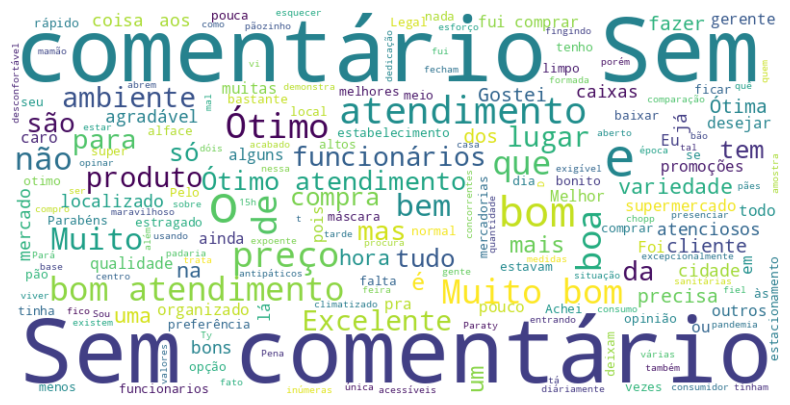

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

palavras = ' '.join(paraty['comentario'])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=200, stopwords=None).generate(palavras)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Deirton

In [28]:
deirton = pd.read_csv("/content/dataset_deirton.csv")

deirton

,WMbnJf href,lDY1rd src,TSUbDb,TSUbDb href,RvU3D href,Msppse href,A503be,QV3IV,Aohxlc,Aohxlc 2,dehysf,Jtu6Td,QWOdjf,QWOdjf 2,Txngnb,Txngnb 2
0,https://www.google.com/maps/contrib/1045546230...,https://lh3.googleusercontent.com/a-/AD_cMMRaW...,Ana Carolina Teixeira Bastos,https://www.google.com/maps/contrib/1045546230...,https://www.google.com/local/review/rap/report...,https://www.google.com/maps/contrib/1045546230...,14 comentários17 fotos,Local Guide,·,·,3 meses atrás,O supermercado conta com produtos variados e b...,0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.
1,https://www.google.com/maps/contrib/1025088582...,https://lh3.googleusercontent.com/a-/AD_cMMQxp...,Denis sousa,https://www.google.com/maps/contrib/1025088582...,https://www.google.com/local/review/rap/report...,https://www.google.com/maps/contrib/1025088582...,24 comentários4 fotos,Local Guide,·,·,um mês atrás,"Até o momento o maior mercantil da cidade,com ...",0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.
2,https://www.google.com/maps/contrib/1033851698...,https://lh3.googleusercontent.com/a-/AD_cMMS4T...,Paulo Vitor,https://www.google.com/maps/contrib/1033851698...,https://www.google.com/local/review/rap/report...,https://www.google.com/maps/contrib/1033851698...,34 comentários18 fotos,Local Guide,·,·,3 meses atrás,Supermercado Excelente para realizar suas comp...,0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.
3,https://www.google.com/maps/contrib/1100503657...,https://lh3.googleusercontent.com/a-/AD_cMMS9O...,Karla Patricia Dos Santos Pinto,https://www.google.com/maps/contrib/1100503657...,https://www.google.com/local/review/rap/report...,https://www.google.com/maps/contrib/1100503657...,2 comentários1 foto,NaN,·,NaN,4 meses atrás,"Atendimento maravilhoso, os funcionários são p...",0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.
4,https://www.google.com/maps/contrib/1161310575...,https://lh3.googleusercontent.com/a-/AD_cMMTwB...,Ricardo Nascimento,https://www.google.com/maps/contrib/1161310575...,https://www.google.com/local/review/rap/report...,https://www.google.com/maps/contrib/1161310575...,6 comentários16 fotos,Local Guide,·,·,um mês atrás,Ótimo atendimento. Promoções e variedade,0.0,Gostei,Agradecemos sua ajuda.,Ocorreu um problema. Tente novamente.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,https://www.google.com/maps/contrib/1144902948...,https://lh3.googleusercontent.com/a-/AD_cMMRVh...,Davi Reis,https://www.google.com/maps/contrib/1144902948...,https://www.google.com/local/review/rap/report...,NaN,NaN,NaN,NaN,NaN,3 anos atrás,NaN,NaN,NaN,NaN,NaN
781,https://www.google.com/maps/contrib/1098124420...,https://lh3.googleusercontent.com/a/AAcHTtegrb...,Gleice Teixeira,https://www.google.com/maps/contrib/1098124420...,https://www.google.com/local/review/rap/report...,https://www.google.com/maps/contrib/1098124420...,11 fotos,NaN,NaN,NaN,4 anos atrás,NaN,NaN,NaN,NaN,NaN
782,https://www.google.com/maps/contrib/1181653842...,https://lh3.googleusercontent.com/a-/AD_cMMSB_...,Maria Lucia,https://www.google.com/maps/contrib/1181653842...,https://www.google.com/local/review/rap/report...,https://www.google.com/maps/contrib/1181653842...,3 comentários,NaN,NaN,NaN,2 anos atrás,NaN,NaN,NaN,NaN,NaN
783,https://www.google.com/maps/contrib/1093933122...,https://lh3.googleusercontent.com/a/AAcHTtdWDd...,auricelia. silva,https://www.google.com/maps/contrib/1093933122...,https://www.google.com/local/review/rap/report...,https://www.google.com/maps/contrib/1093933122...,Um comentário,NaN,NaN,NaN,2 anos atrás,NaN,NaN,NaN,NaN,NaN


In [29]:
print(deirton.columns)

Index(['WMbnJf href', 'lDY1rd src', 'TSUbDb', 'TSUbDb href', 'RvU3D href',
       'Msppse href', 'A503be', 'QV3IV', 'Aohxlc', 'Aohxlc 2', 'dehysf',
       'Jtu6Td', 'QWOdjf', 'QWOdjf 2', 'Txngnb', 'Txngnb 2'],
      dtype='object')


In [30]:
deirton.drop("WMbnJf href", axis=1, inplace=True)
deirton.drop("lDY1rd src", axis=1, inplace=True)
deirton.drop("TSUbDb href", axis=1, inplace=True)
deirton.drop("RvU3D href", axis=1, inplace=True)
deirton.drop("Msppse href", axis=1, inplace=True)
deirton.drop("Aohxlc", axis=1, inplace=True)
deirton.drop("Aohxlc 2", axis=1, inplace=True)
deirton.drop("QWOdjf 2", axis=1, inplace=True)
deirton.drop("Txngnb 2", axis=1, inplace=True)

In [31]:
deirton

,TSUbDb,A503be,QV3IV,dehysf,Jtu6Td,QWOdjf,Txngnb
0,Ana Carolina Teixeira Bastos,14 comentários17 fotos,Local Guide,3 meses atrás,O supermercado conta com produtos variados e b...,0.0,Agradecemos sua ajuda.
1,Denis sousa,24 comentários4 fotos,Local Guide,um mês atrás,"Até o momento o maior mercantil da cidade,com ...",0.0,Agradecemos sua ajuda.
2,Paulo Vitor,34 comentários18 fotos,Local Guide,3 meses atrás,Supermercado Excelente para realizar suas comp...,0.0,Agradecemos sua ajuda.
3,Karla Patricia Dos Santos Pinto,2 comentários1 foto,NaN,4 meses atrás,"Atendimento maravilhoso, os funcionários são p...",0.0,Agradecemos sua ajuda.
4,Ricardo Nascimento,6 comentários16 fotos,Local Guide,um mês atrás,Ótimo atendimento. Promoções e variedade,0.0,Agradecemos sua ajuda.
...,...,...,...,...,...,...,...
780,Davi Reis,NaN,NaN,3 anos atrás,NaN,NaN,NaN
781,Gleice Teixeira,11 fotos,NaN,4 anos atrás,NaN,NaN,NaN
782,Maria Lucia,3 comentários,NaN,2 anos atrás,NaN,NaN,NaN
783,auricelia. silva,Um comentário,NaN,2 anos atrás,NaN,NaN,NaN


In [32]:
nome_colunas_d = {
    'TSUbDb': 'nome',
    'QV3IV': 'local_guide',
    'dehysf': 'periodo',
    'Jtu6Td': 'comentario',
    'QWOdjf': 'quant_like_coment',
    'Txngnb': 'feedback_super'}

deirton.rename(columns=nome_colunas_d, inplace=True)
deirton

,nome,A503be,local_guide,periodo,comentario,quant_like_coment,feedback_super
0,Ana Carolina Teixeira Bastos,14 comentários17 fotos,Local Guide,3 meses atrás,O supermercado conta com produtos variados e b...,0.0,Agradecemos sua ajuda.
1,Denis sousa,24 comentários4 fotos,Local Guide,um mês atrás,"Até o momento o maior mercantil da cidade,com ...",0.0,Agradecemos sua ajuda.
2,Paulo Vitor,34 comentários18 fotos,Local Guide,3 meses atrás,Supermercado Excelente para realizar suas comp...,0.0,Agradecemos sua ajuda.
3,Karla Patricia Dos Santos Pinto,2 comentários1 foto,NaN,4 meses atrás,"Atendimento maravilhoso, os funcionários são p...",0.0,Agradecemos sua ajuda.
4,Ricardo Nascimento,6 comentários16 fotos,Local Guide,um mês atrás,Ótimo atendimento. Promoções e variedade,0.0,Agradecemos sua ajuda.
...,...,...,...,...,...,...,...
780,Davi Reis,NaN,NaN,3 anos atrás,NaN,NaN,NaN
781,Gleice Teixeira,11 fotos,NaN,4 anos atrás,NaN,NaN,NaN
782,Maria Lucia,3 comentários,NaN,2 anos atrás,NaN,NaN,NaN
783,auricelia. silva,Um comentário,NaN,2 anos atrás,NaN,NaN,NaN


In [33]:
deirton['quant_like_coment'].fillna(0, inplace=True)

deirton['local_guide'].fillna("Not Local Guide", inplace=True)

deirton['comentario'].fillna("Sem comentário", inplace=True)

deirton['feedback_super'].fillna("Sem feedback", inplace=True)

deirton

,nome,A503be,local_guide,periodo,comentario,quant_like_coment,feedback_super
0,Ana Carolina Teixeira Bastos,14 comentários17 fotos,Local Guide,3 meses atrás,O supermercado conta com produtos variados e b...,0.0,Agradecemos sua ajuda.
1,Denis sousa,24 comentários4 fotos,Local Guide,um mês atrás,"Até o momento o maior mercantil da cidade,com ...",0.0,Agradecemos sua ajuda.
2,Paulo Vitor,34 comentários18 fotos,Local Guide,3 meses atrás,Supermercado Excelente para realizar suas comp...,0.0,Agradecemos sua ajuda.
3,Karla Patricia Dos Santos Pinto,2 comentários1 foto,Not Local Guide,4 meses atrás,"Atendimento maravilhoso, os funcionários são p...",0.0,Agradecemos sua ajuda.
4,Ricardo Nascimento,6 comentários16 fotos,Local Guide,um mês atrás,Ótimo atendimento. Promoções e variedade,0.0,Agradecemos sua ajuda.
...,...,...,...,...,...,...,...
780,Davi Reis,NaN,Not Local Guide,3 anos atrás,Sem comentário,0.0,Sem feedback
781,Gleice Teixeira,11 fotos,Not Local Guide,4 anos atrás,Sem comentário,0.0,Sem feedback
782,Maria Lucia,3 comentários,Not Local Guide,2 anos atrás,Sem comentário,0.0,Sem feedback
783,auricelia. silva,Um comentário,Not Local Guide,2 anos atrás,Sem comentário,0.0,Sem feedback


In [34]:
divisaod = pd.DataFrame(deirton['A503be'])

divisaod['quant_comentarios'] = divisaod['A503be'].str.extract(r'(\d+) comentários', expand=False).fillna(0).astype(int)
divisaod['quant_fotos'] = divisaod['A503be'].str.extract(r'(\d+) fotos', expand=False).fillna(0).astype(int)

print(divisaod[['quant_comentarios', 'quant_fotos']])

     quant_comentarios  quant_fotos
0                   14           17
1                   24            4
2                   34           18
3                    2            0
4                    6           16
..                 ...          ...
780                  0            0
781                  0           11
782                  3            0
783                  0            0
784                  3            0

[785 rows x 2 columns]


In [35]:
deirton = pd.concat([deirton, divisaod[['quant_comentarios', 'quant_fotos']]], axis=1)

In [36]:
deirton.drop("A503be", axis=1, inplace=True)
deirton

,nome,local_guide,periodo,comentario,quant_like_coment,feedback_super,quant_comentarios,quant_fotos
0,Ana Carolina Teixeira Bastos,Local Guide,3 meses atrás,O supermercado conta com produtos variados e b...,0.0,Agradecemos sua ajuda.,14,17
1,Denis sousa,Local Guide,um mês atrás,"Até o momento o maior mercantil da cidade,com ...",0.0,Agradecemos sua ajuda.,24,4
2,Paulo Vitor,Local Guide,3 meses atrás,Supermercado Excelente para realizar suas comp...,0.0,Agradecemos sua ajuda.,34,18
3,Karla Patricia Dos Santos Pinto,Not Local Guide,4 meses atrás,"Atendimento maravilhoso, os funcionários são p...",0.0,Agradecemos sua ajuda.,2,0
4,Ricardo Nascimento,Local Guide,um mês atrás,Ótimo atendimento. Promoções e variedade,0.0,Agradecemos sua ajuda.,6,16
...,...,...,...,...,...,...,...,...
780,Davi Reis,Not Local Guide,3 anos atrás,Sem comentário,0.0,Sem feedback,0,0
781,Gleice Teixeira,Not Local Guide,4 anos atrás,Sem comentário,0.0,Sem feedback,0,11
782,Maria Lucia,Not Local Guide,2 anos atrás,Sem comentário,0.0,Sem feedback,3,0
783,auricelia. silva,Not Local Guide,2 anos atrás,Sem comentário,0.0,Sem feedback,0,0


In [37]:
deirton['supermercado'] = 'Deirton'
deirton['rua_supermercado'] = 'Fausto Pinheiro, 316'
df_deirton = deirton

In [38]:
df_deirton.to_csv("deirton_tratado.csv")

# Juntando os 3 supermercados

In [48]:
d = pd.read_csv("/content/deirton_tratado.csv")
mp = pd.read_csv("/content/menorpreco_tratado.csv")
p = pd.read_csv("/content/paraty_tratado.csv")
supermercados = pd.concat([d, mp, p])

supermercados



,Unnamed: 0,nome,local_guide,periodo,comentario,quant_like_coment,feedback_super,quant_comentarios,quant_fotos,supermercado,rua_supermercado
0,0,Ana Carolina Teixeira Bastos,Local Guide,3 meses atrás,O supermercado conta com produtos variados e b...,0.0,Agradecemos sua ajuda.,14,17,Deirton,"Fausto Pinheiro, 316"
1,1,Denis sousa,Local Guide,um mês atrás,"Até o momento o maior mercantil da cidade,com ...",0.0,Agradecemos sua ajuda.,24,4,Deirton,"Fausto Pinheiro, 316"
2,2,Paulo Vitor,Local Guide,3 meses atrás,Supermercado Excelente para realizar suas comp...,0.0,Agradecemos sua ajuda.,34,18,Deirton,"Fausto Pinheiro, 316"
3,3,Karla Patricia Dos Santos Pinto,Not Local Guide,4 meses atrás,"Atendimento maravilhoso, os funcionários são p...",0.0,Agradecemos sua ajuda.,2,0,Deirton,"Fausto Pinheiro, 316"
4,4,Ricardo Nascimento,Local Guide,um mês atrás,Ótimo atendimento. Promoções e variedade,0.0,Agradecemos sua ajuda.,6,16,Deirton,"Fausto Pinheiro, 316"
...,...,...,...,...,...,...,...,...,...,...,...
356,356,ZARIFF LUTIF PESSOA ROCHA,Not Local Guide,3 anos atrás,Sem comentário,0.0,Sem feedback,0,0,Paraty,"Bacharel José Airton Rocha, 1655"
357,357,xavier mota,Not Local Guide,3 anos atrás,Sem comentário,0.0,Sem feedback,0,19,Paraty,"Bacharel José Airton Rocha, 1655"
358,358,Mônica Vieira,Local Guide,4 anos atrás,Sem comentário,0.0,Sem feedback,25,7,Paraty,"Bacharel José Airton Rocha, 1655"
359,359,Luciana,Not Local Guide,2 anos atrás,Sem comentário,0.0,Sem feedback,0,0,Paraty,"Bacharel José Airton Rocha, 1655"


In [40]:
supermercados.to_csv("3supermercados.csv")